In [5]:
#Import relevant libraries 
import pandas as pd
import numpy as np
import yfinance as yf
import hvplot.pandas
import datetime as dt
import pandas_datareader as pdr

In [6]:
#Set up function to pull stock data from Yahoo Finance (yfinance) library
data_stock = []
    
def stock_pull(ticker, start, end):
    data = pdr.get_data_yahoo(ticker, start, end)
    ticker_data = pd.DataFrame(data)
    ticker_data.dtypes
    ticker_data["Daily Returns"] = ticker_data["Adj Close"].pct_change()
    return ticker_data

In [7]:
#Define start and end dates for the stock data
start = dt.datetime(2020, 11, 10)
end = dt.datetime(2022, 12, 10)

In [8]:
#Set the ticker and pull the stock data from start to end dates
COP_data = stock_pull("COP", start, end)

In [9]:
#Review COP stock data dataframe
display(COP_data.head(10))

,High,Low,Open,Close,Volume,Adj Close,Daily Returns
Date,,,,,,,
2020-11-10,35.540001,33.590000,34.349998,35.529999,20650600.0,32.723637,NaN
2020-11-11,36.200001,35.060001,35.959999,35.279999,17225000.0,32.493382,-0.007036
2020-11-12,35.209999,33.599998,34.599998,34.009998,10944500.0,31.323698,-0.035998
2020-11-13,35.560001,34.250000,34.349998,35.360001,11997500.0,32.567062,0.039694
2020-11-16,38.130001,36.400002,36.950001,38.080002,18701200.0,35.072224,0.076923
2020-11-17,39.130001,37.240002,37.520000,38.849998,14466800.0,35.781403,0.020221
2020-11-18,40.869999,38.650002,38.959999,39.180000,23319600.0,36.085342,0.008494
2020-11-19,39.610001,38.380001,38.709999,39.470001,12504100.0,36.352425,0.007401
2020-11-20,39.930000,39.139999,39.310001,39.650002,12037800.0,36.518215,0.004561


In [10]:
# Create a separate dataframe for the Daily Returns and drop the first row (NaN)
cop_dr = pd.DataFrame(COP_data['Daily Returns']).dropna()

In [11]:
#Review the Daily Returns DataFrame
cop_dr.head(10)

,Daily Returns
Date,
2020-11-11,-0.007036
2020-11-12,-0.035998
2020-11-13,0.039694
2020-11-16,0.076923
2020-11-17,0.020221
2020-11-18,0.008494
2020-11-19,0.007401
2020-11-20,0.004561
2020-11-23,0.077175


In [12]:
#Import Relevant libraries for Sentiment Analysis
from newsapi import NewsApiClient
import pandas as pd
from urllib.request import urlopen, Request
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import hvplot.pandas
import holoviews as hv
from holoviews import opts
import numpy as np

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ggoro\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
#API key for auth
newsapi = NewsApiClient(api_key='4fde5b55efb247e6858a71d756d25fa6')

In [14]:
#query to newsapi to get articles for past 2 years 
articles = []

for i in range(1,4,1):
    articles_page = newsapi.get_everything(
            q='ConocoPhillips',
            #sources='abc-news-au, news-com-au',
            sources='cnn, the-washington-post, fox-news,abc-news-au, news-com-au',
            #domains='http://www.cnn.com,
            from_param='2022-12-10',
            to='2018-11-10',
            language='en',
            sort_by='popularity',
            page=i)
    articles.extend(articles_page['articles'])

# outside of the loop, create the DataFrame
articles 
df= pd.DataFrame(articles)

In [15]:
#dropping columns to data cleaning
df2=df.drop(["source","author","title","description","url","urlToImage"], axis=1)

In [16]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()
# Set column names
 #columns = ['ticker', 'date', 'time', 'headline']
# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
 #parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)
    
# Iterate through the headlines and get the polarity scores using vader
scores = df2['content'].apply(vader.polarity_scores).tolist()
#Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)
# Join the DataFrames of the news and the list of dicts
df2 = df2.join(scores_df, rsuffix='_right')


In [17]:
#Renaming the columns to Date and Headlines 
df2.rename(columns= {'publishedAt': 'Date'}, inplace = True)
df2.rename(columns= {'content': 'News'}, inplace = True)
# Convert the date column from string to datetime
df2['Date'] = pd.to_datetime(df2.Date).dt.date

In [18]:
#Sort the data by date 
df3 = df2.sort_values(by='Date', ascending=True)
display(df3)

,Date,News,neg,neu,pos,compound
106,2018-11-22,"Posted November 22, 2018 14:33:32 Timor-Leste ...",0.051,0.748,0.201,0.7506
19,2018-12-13,"Updated December 13, 2018 15:34:24 About one-t...",0.127,0.727,0.146,0.4248
92,2018-12-18,"Posted \r\nDecember 19, 2018 09:51:44\r\nHeari...",0.091,0.854,0.055,-0.2960
75,2018-12-18,THE LIGHTBULB Interior Deputy Secretary David ...,0.000,1.000,0.000,0.0000
78,2019-01-17,THE LIGHTBULB\r\nActing Environmental Protecti...,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...
2,2022-10-30,A version of this story first appeared in CNN ...,0.000,0.921,0.079,0.4588
14,2022-11-16,A Federal Court justice has questioned Santos'...,0.105,0.804,0.091,0.1280
8,2022-12-02,Gas company Santos has lost its appeal against...,0.061,0.765,0.174,0.5106
15,2022-12-03,Gas company Santos lost a landmark legal battl...,0.127,0.801,0.072,-0.4767


In [19]:
#Re-arranging the column to index with "date"
df3.iloc[:,[1,0,2,3,4,5]]

,News,Date,neg,neu,pos,compound
106,"Posted November 22, 2018 14:33:32 Timor-Leste ...",2018-11-22,0.051,0.748,0.201,0.7506
19,"Updated December 13, 2018 15:34:24 About one-t...",2018-12-13,0.127,0.727,0.146,0.4248
92,"Posted \r\nDecember 19, 2018 09:51:44\r\nHeari...",2018-12-18,0.091,0.854,0.055,-0.2960
75,THE LIGHTBULB Interior Deputy Secretary David ...,2018-12-18,0.000,1.000,0.000,0.0000
78,THE LIGHTBULB\r\nActing Environmental Protecti...,2019-01-17,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...
2,A version of this story first appeared in CNN ...,2022-10-30,0.000,0.921,0.079,0.4588
14,A Federal Court justice has questioned Santos'...,2022-11-16,0.105,0.804,0.091,0.1280
8,Gas company Santos has lost its appeal against...,2022-12-02,0.061,0.765,0.174,0.5106
15,Gas company Santos lost a landmark legal battl...,2022-12-03,0.127,0.801,0.072,-0.4767


In [20]:
#create a dataframe with Dates and Compound scores only
compound_score = pd.DataFrame(df3[['compound', 'Date']])

In [21]:
#Review the compound score dataframe
compound_score

,compound,Date
106,0.7506,2018-11-22
19,0.4248,2018-12-13
92,-0.2960,2018-12-18
75,0.0000,2018-12-18
78,0.0000,2019-01-17
...,...,...
2,0.4588,2022-10-30
14,0.1280,2022-11-16
8,0.5106,2022-12-02
15,-0.4767,2022-12-03


In [22]:
#Set the Date column to a datetime format using pandas to_datetime
compound_score['Date'] = pd.to_datetime(compound_score['Date'], format='%Y/%m/%d')

In [23]:
#Set the Date column as an index
compound_score = compound_score.set_index('Date')

In [24]:
#Combine compound scores from same dates and average them to get just one score for the duplicate date
compound_score = compound_score.groupby('Date').mean()

#Review the dataframe
compound_score.tail(15)

,compound
Date,
2022-08-04,0.0000
2022-08-09,0.4389
2022-08-22,0.1280
2022-08-24,0.2783
2022-09-21,0.6124
2022-09-25,0.6844
2022-10-17,0.3818
2022-10-18,0.9259
2022-10-19,0.8718


In [25]:
#Shift the Daily Returns one day to show next day's returns on its' previous date
cop_dr = cop_dr.shift(-1)

In [26]:
#Merge the compound scores df with the next day's daily returns df by date and create a new dataframe
cd = pd.merge(cop_dr, compound_score, on="Date")

In [27]:
#Review the merged dataframe with compound scores and next day's Daily Returns
cd.tail(15)

,Daily Returns,compound
Date,,
2022-06-27,0.032419,0.7345
2022-07-11,-0.024547,0.7345
2022-07-15,0.026300,0.0000
2022-08-04,0.033044,0.0000
2022-08-09,0.004921,0.4389
2022-08-22,0.030502,0.1280
2022-08-24,0.014115,0.2783
2022-09-21,-0.009272,0.6124
2022-10-17,-0.003971,0.3818


In [28]:
#Review correlation for positive compound scores and next day's Daily Returns
cd[cd.compound>0].corr()

,Daily Returns,compound
Daily Returns,1.000000,-0.011965
compound,-0.011965,1.000000


In [29]:
#Review correlation for compound scores above 0.6 and next day's Daily Returns - correlation got stronger
cd[cd.compound>0.6].corr()

,Daily Returns,compound
Daily Returns,1.00000,0.11461
compound,0.11461,1.00000


In [30]:
#Create two functions to assign 1 to positive compound scores and positive Daily Returns values and -1 to negative values. 0 to zero values

def cmpnd(value):
    if value > 0: 
        return 1
    elif value < 0:
        return -1
    else:
        return 0
    

cd['cmpnd'] = cd['compound'].map(cmpnd)

def DR(value):
    if value > 0: 
        return 1
    elif value < 0:
        return -1
    else:
        return 0
    

cd['DR'] = cd['Daily Returns'].map(DR)

#Reveiw the two newly added columns that identify the positive and negative values for each data
cd.tail(15)


,Daily Returns,compound,cmpnd,DR
Date,,,,
2022-06-27,0.032419,0.7345,1,1
2022-07-11,-0.024547,0.7345,1,-1
2022-07-15,0.026300,0.0000,0,1
2022-08-04,0.033044,0.0000,0,1
2022-08-09,0.004921,0.4389,1,1
2022-08-22,0.030502,0.1280,1,1
2022-08-24,0.014115,0.2783,1,1
2022-09-21,-0.009272,0.6124,1,-1
2022-10-17,-0.003971,0.3818,1,-1


In [31]:
#Create a new column adding the positive/negative identifiers for compound and Daily Returns values
cd['match'] = cd['DR'] + cd['cmpnd']

#Review the dataframe to check for new 'match' column
cd

,Daily Returns,compound,cmpnd,DR,match
Date,,,,,
2020-11-20,0.077175,0.0000,0,1,1
2020-12-02,0.030773,0.4404,1,1,2
2020-12-21,-0.030070,0.5994,1,-1,0
2021-01-04,0.057367,0.4939,1,1,2
2021-01-05,0.039914,0.3182,1,1,2
...,...,...,...,...,...
2022-10-19,0.005780,0.8718,1,1,2
2022-10-25,0.021220,0.8653,1,1,2
2022-11-16,0.015088,0.1280,1,1,2


In [32]:
#Check how many rows of data are in the df - 62 rows
cd.shape

(62, 5)

In [33]:
#Check how many times the compound scores and next day's Daily Returns were both positive or negative out of the 62 rows
total_match = cd['match'].eq(2).sum() + cd['match'].eq(-2).sum()
total_match

26

In [34]:
print('The sentiment and daily returns matched 26 out of 62 times or 41.9%')

The sentiment and daily returns matched 26 out of 62 times or 41.9%


In [35]:
#Check how many positive Compound scores were in the cd dataframe - 37
cd[cd.compound>0].shape

(37, 5)

In [36]:
#Check just for positive match
pos_match = cd['match'].eq(2).sum()
pos_match

22

In [37]:
print('A positive sentiment compound score resulted in positive Daily Returns the next day 22 out of 37 times or 59.5%')

A positive sentiment compound score resulted in positive Daily Returns the next day 22 out of 37 times or 59.5%


In [38]:
#get close prices from the COP sotck data for algo tradin strategy
cop_close = pd.DataFrame(COP_data['Close'])

#Review
cop_close

,Close
Date,
2020-11-10,35.529999
2020-11-11,35.279999
2020-11-12,34.009998
2020-11-13,35.360001
2020-11-16,38.080002
...,...
2022-12-05,119.370003
2022-12-06,115.610001
2022-12-07,114.879997


In [39]:
#merge the close prices to the cd dataframe - strategy is to buy at close when a positive compound score occurs
algo = pd.merge(cop_close, cd, on="Date")

In [40]:
#isolate the close and compound scores columns 
algo = algo[['Close', 'cmpnd']]

#review the dataframe
algo

,Close,cmpnd
Date,,
2020-11-20,39.650002,0
2020-12-02,39.970001,1
2020-12-21,40.240002,1
2021-01-04,39.570000,1
2021-01-05,41.840000,1
...,...,...
2022-10-19,121.110001,1
2022-10-25,123.940002,1
2022-11-16,129.240005,1


In [41]:
#set up a new column that shows "buy" signal on all positive compound scores
def signal(value):
    if value == 1:
        return 'buy'  
    else:
        return 'none'

#Add the signal column to the dataframe
algo['signal'] = algo['cmpnd'].map(signal)

#Review Dataframe
algo

,Close,cmpnd,signal
Date,,,
2020-11-20,39.650002,0,none
2020-12-02,39.970001,1,buy
2020-12-21,40.240002,1,buy
2021-01-04,39.570000,1,buy
2021-01-05,41.840000,1,buy
...,...,...,...
2022-10-19,121.110001,1,buy
2022-10-25,123.940002,1,buy
2022-11-16,129.240005,1,buy


In [42]:
#Set up share sizes
share_size = 100

In [43]:
#Set up a new column that shows Next Day Close prices - Strategy is to buy at close on day of positive compound score and sell at close next day
cop_sh_close = pd.DataFrame(COP_data['Close']).shift(-1)
cop_sh_close.rename(columns={'Close': 'Day 2 Close'}, inplace=True)

#Review the "Day 2 Close" column
cop_sh_close

,Day 2 Close
Date,
2020-11-10,35.279999
2020-11-11,34.009998
2020-11-12,35.360001
2020-11-13,38.080002
2020-11-16,38.849998
...,...
2022-12-05,115.610001
2022-12-06,114.879997
2022-12-07,112.599998


In [44]:
#Merge the "Day 2 Close" column into the algo df to show the price to sell at
algo_v2 = pd.merge(cop_sh_close, algo, on="Date")

#review the df
algo_v2

,Day 2 Close,Close,cmpnd,signal
Date,,,,
2020-11-20,42.709999,39.650002,0,none
2020-12-02,41.200001,39.970001,1,buy
2020-12-21,39.029999,40.240002,1,buy
2021-01-04,41.840000,39.570000,1,buy
2021-01-05,43.509998,41.840000,1,buy
...,...,...,...,...
2022-10-19,121.809998,121.110001,1,buy
2022-10-25,126.570000,123.940002,1,buy
2022-11-16,131.190002,129.240005,1,buy


In [45]:
#Set up a BACKTEST to buy 100 shares at 'Close' price and sell 100 shares at 'Day 2 Close' price when the signal is 'buy'. Create a Proceeds Columns to show result of each trade
for index, row in algo_v2.iterrows():
    if row['cmpnd'] == 1:
        algo_v2.loc[index, "signal"] = "buy"
        algo_v2.loc[index, "proceeds"] = -(row["Close"] * share_size)+(row["Day 2 Close"] * share_size)
    if row['cmpnd'] == -1:
        algo_v2.loc[index, "signal"] = "none"
        algo_v2.loc[index, "proceeds"] = 0

In [46]:
#Review the results
display(algo_v2.dropna().head(10))
display(algo_v2.dropna().tail(10))

,Day 2 Close,Close,cmpnd,signal,proceeds
Date,,,,,
2020-12-02,41.200001,39.970001,1,buy,122.999954
2020-12-21,39.029999,40.240002,1,buy,-121.000290
2021-01-04,41.840000,39.570000,1,buy,227.000046
2021-01-05,43.509998,41.840000,1,buy,166.999817
2021-01-12,47.029999,47.419998,1,buy,-38.999939
2021-01-15,46.000000,45.119999,-1,none,0.000000
2021-02-09,47.250000,46.880001,1,buy,36.999893
2021-03-23,53.209999,51.709999,-1,none,0.000000
2021-03-30,52.970001,53.430000,1,buy,-45.999908


,Day 2 Close,Close,cmpnd,signal,proceeds
Date,,,,,
2022-08-09,95.980003,95.510002,1,buy,47.000122
2022-08-22,108.449997,105.239998,1,buy,320.999908
2022-08-24,112.080002,110.519997,1,buy,156.000519
2022-09-21,110.059998,111.089996,1,buy,-102.999878
2022-10-17,117.889999,118.360001,1,buy,-47.000122
2022-10-18,121.110001,117.889999,1,buy,322.000122
2022-10-19,121.809998,121.110001,1,buy,69.999695
2022-10-25,126.570000,123.940002,1,buy,262.999725
2022-11-16,131.190002,129.240005,1,buy,194.999695


In [47]:
#Calculate and review the overall profits of the backtest
profit = round(algo_v2["proceeds"].sum(), 2)

profit

2107.0

In [48]:
#Create a returns column that gets the percentage return for each trade
algo_v2['return'] = (algo_v2['Day 2 Close'] - algo_v2['Close']) / algo_v2['Close'] 

In [49]:
#Review the Dataframe for the trades, removing the unnecessary rows that were not traded
algo_v3 = algo_v2[algo_v2.cmpnd>0]
algo_v3

,Day 2 Close,Close,cmpnd,signal,proceeds,return
Date,,,,,,
2020-12-02,41.200001,39.970001,1,buy,122.999954,0.030773
2020-12-21,39.029999,40.240002,1,buy,-121.000290,-0.030070
2021-01-04,41.840000,39.570000,1,buy,227.000046,0.057367
2021-01-05,43.509998,41.840000,1,buy,166.999817,0.039914
2021-01-12,47.029999,47.419998,1,buy,-38.999939,-0.008224
2021-02-09,47.250000,46.880001,1,buy,36.999893,0.007892
2021-03-30,52.970001,53.430000,1,buy,-45.999908,-0.008609
2021-05-03,52.570000,52.740002,1,buy,-17.000198,-0.003223
2021-06-04,59.810001,59.849998,1,buy,-3.999710,-0.000668


In [50]:
#Plot proceeds bar chart
algo_v3['proceeds'].hvplot.bar(height=500, width=1000, rot=90)

:Bars   [Date]   (proceeds)

In [51]:
#Calculate the cummulative returns of all the trades
cum_ret = (algo_v3['return']+1).cumprod()
cum_ret

Date
2020-12-02    1.030773
2020-12-21    0.999778
2021-01-04    1.057132
2021-01-05    1.099326
2021-01-12    1.090285
2021-02-09    1.098890
2021-03-30    1.089429
2021-05-03    1.085918
2021-06-04    1.085192
2021-08-09    1.105350
2021-08-19    1.112306
2021-10-27    1.123066
2021-12-03    1.149914
2022-03-03    1.183676
2022-03-08    1.152646
2022-03-11    1.130861
2022-03-22    1.159752
2022-03-23    1.161641
2022-04-05    1.155599
2022-04-27    1.211355
2022-05-19    1.216102
2022-06-02    1.249530
2022-06-08    1.215693
2022-06-09    1.197954
2022-06-27    1.236790
2022-07-11    1.206430
2022-08-09    1.212367
2022-08-22    1.249346
2022-08-24    1.266981
2022-09-21    1.255234
2022-10-17    1.250250
2022-10-18    1.284398
2022-10-19    1.291822
2022-10-25    1.319234
2022-11-16    1.339139
2022-12-02    1.308341
2022-12-09         NaN
Name: return, dtype: float64

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

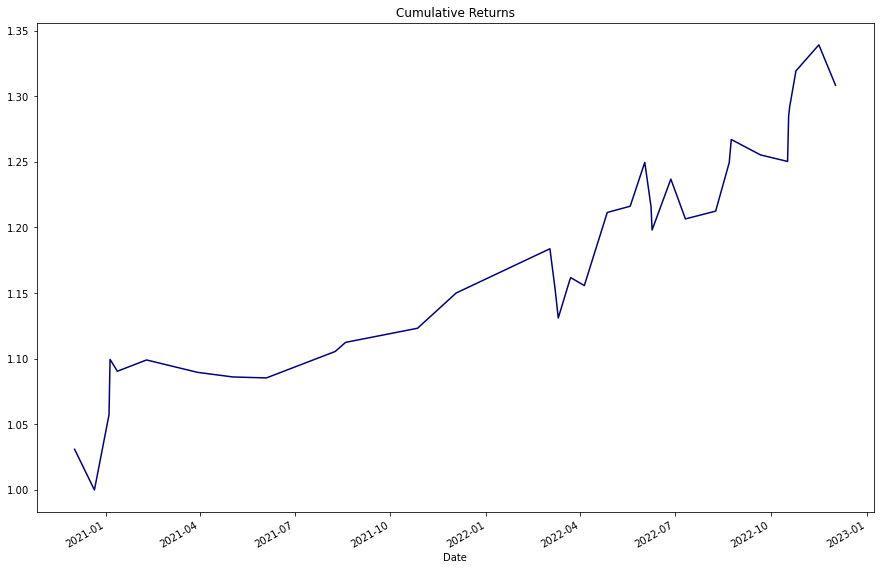

In [52]:
#Plot the cummulative retunrns in line chart format
cum_ret.plot(figsize=(15,10), color= 'navy', title = 'Cumulative Returns')